<a href="https://colab.research.google.com/github/Ka275578/Adult_census_income/blob/main/Adult_census_income_second_commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#reading dataset (from github repository)
df= pd.read_csv('https://raw.githubusercontent.com/Ka275578/Adult_census_income/main/adult.csv')


In [50]:
#checking the view of data
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [51]:
#checking the Description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [52]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [53]:
df.shape

(32561, 15)

In [54]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

So we can see there are no null values in our dataset, but there are some values given as '?' which we can consider as missing values

In [55]:
#columns of the dataset
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## Data Cleaning

In [56]:
#Replacing missing values,'?' with the mode
for column in df.columns:
  #finding mode of a particular column
  mod =df[column].mode()[0]
  #replacing missing or irrelevant values with the mode
  df[column] = df[column].replace(['?'],mod)

In [57]:
#checking df after replacing values
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Missing valuse has been replaced

# Data vizualization


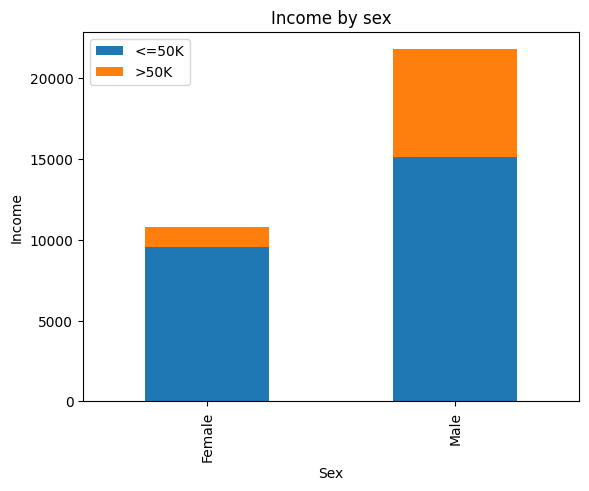

In [60]:
grouped_data = df.groupby(['sex','income'])['income'].count().unstack()
#
ax= grouped_data.plot(kind='bar', stacked = 'True')
#setting labels
ax.set_xlabel('Sex')
ax.set_ylabel('Income')
ax.set_title('Income by sex')
ax.legend(['<=50K', '>50K'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'INCOME DISTRIBUTION')

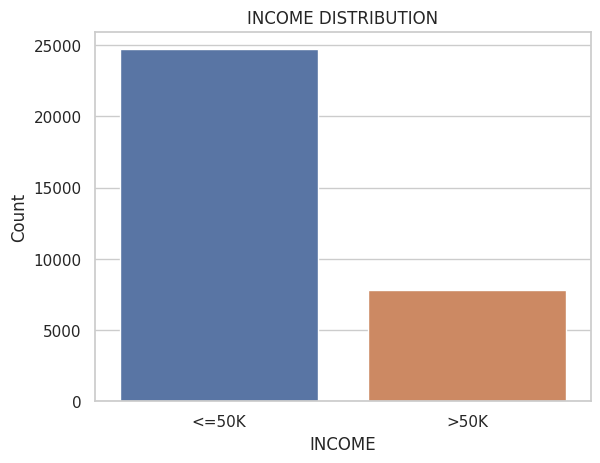

In [66]:
#Creating countplot of income
sns.set(style='whitegrid')
sns.countplot(x='income', data =df)
plt.xlabel('INCOME')
plt.ylabel('Count')
plt.title('INCOME DISTRIBUTION')
plt.show()

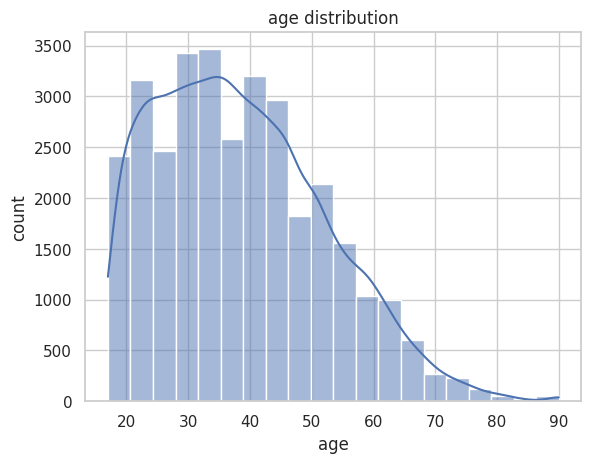

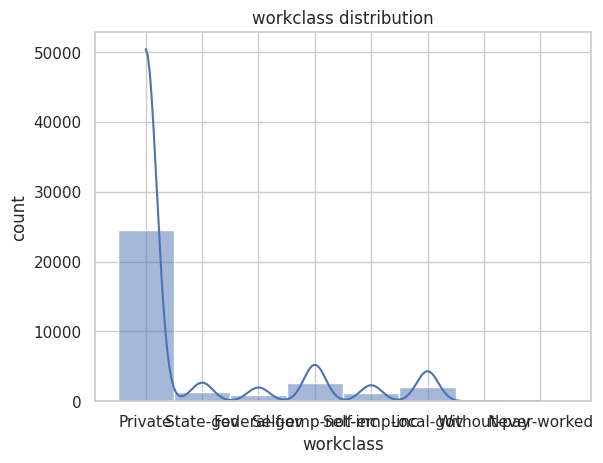

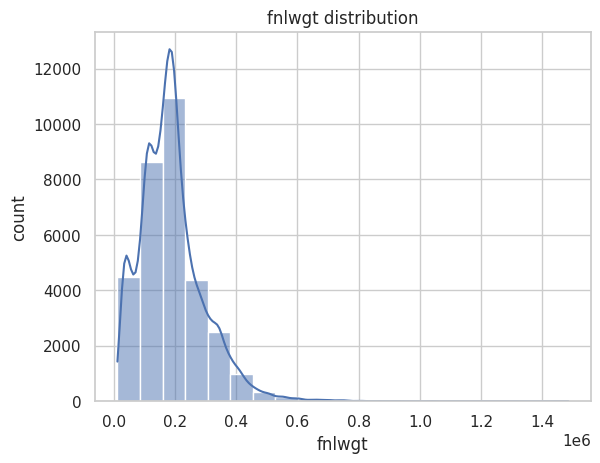

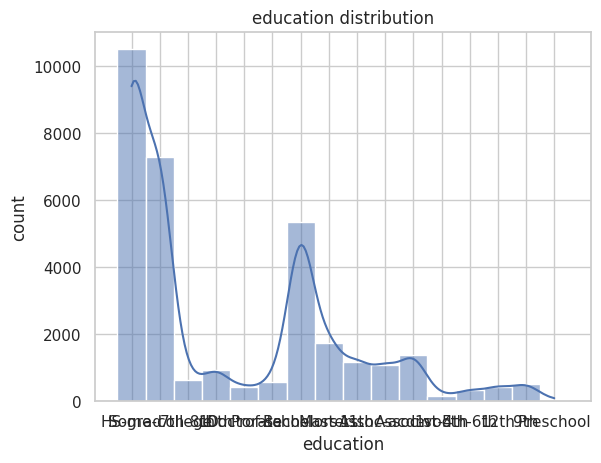

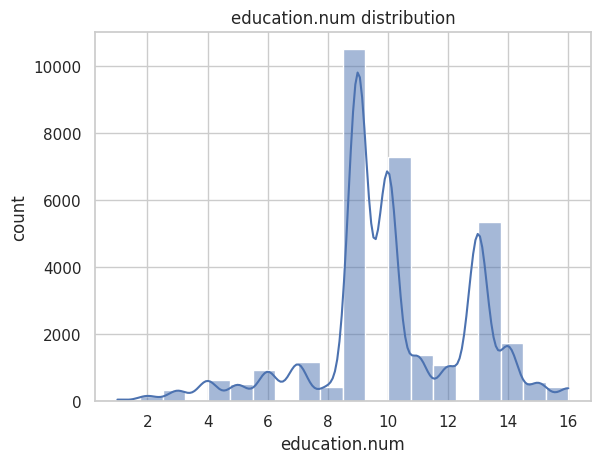

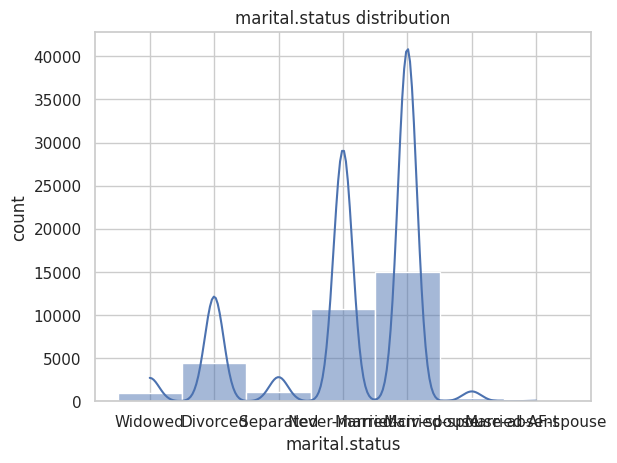

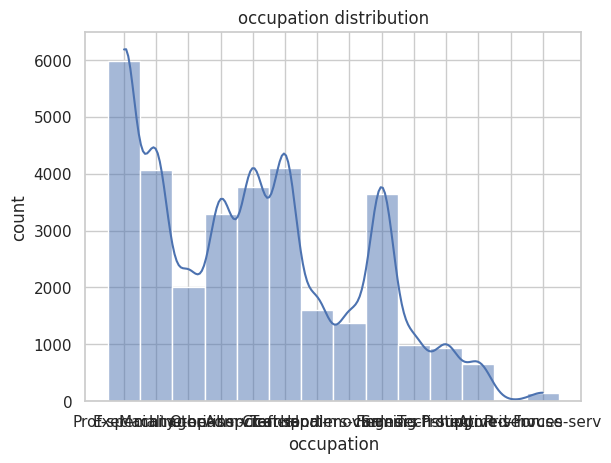

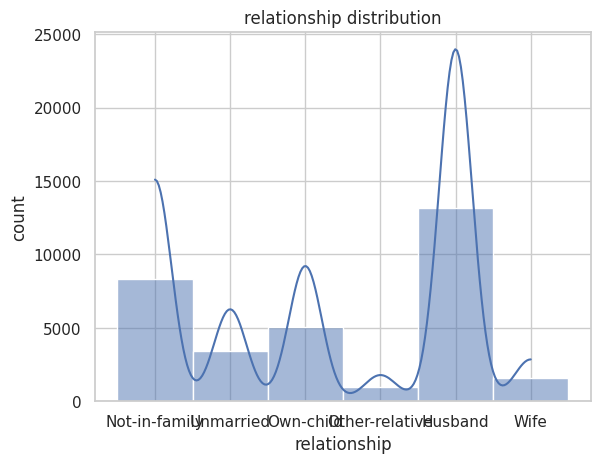

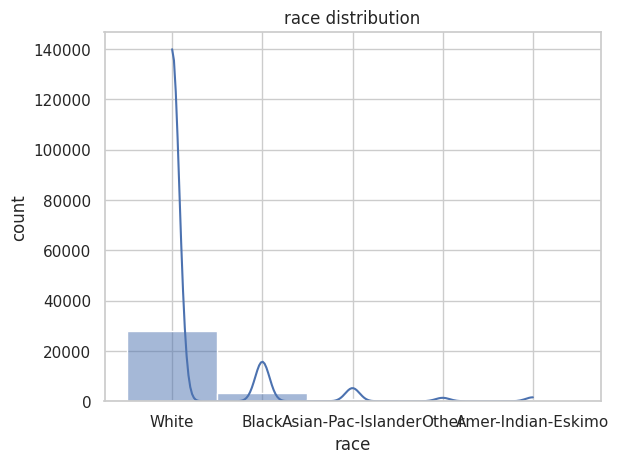

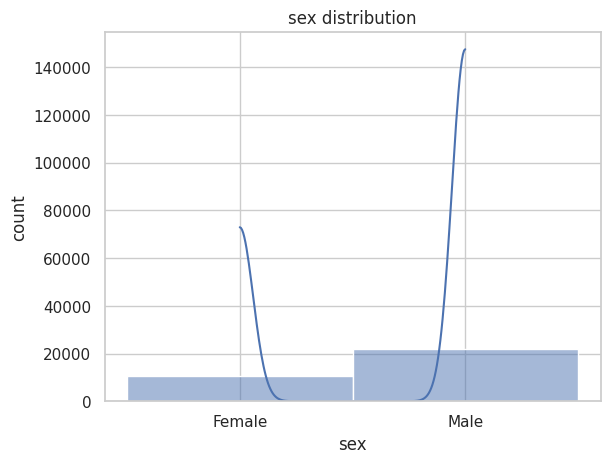

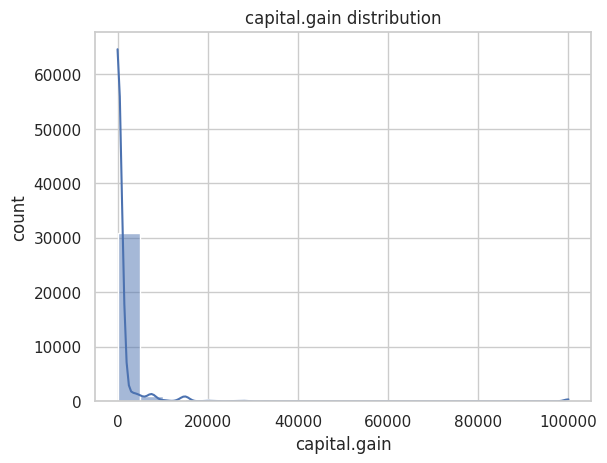

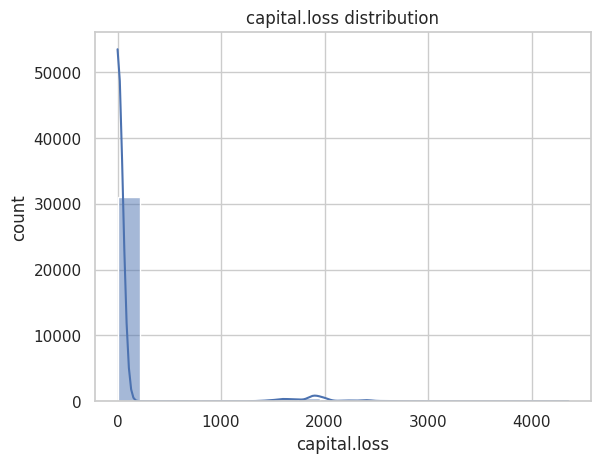

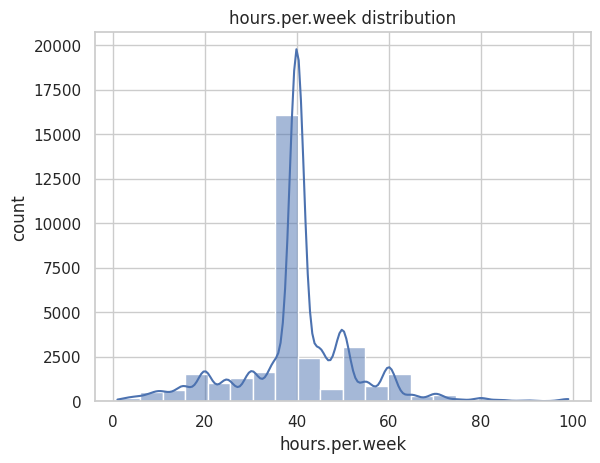

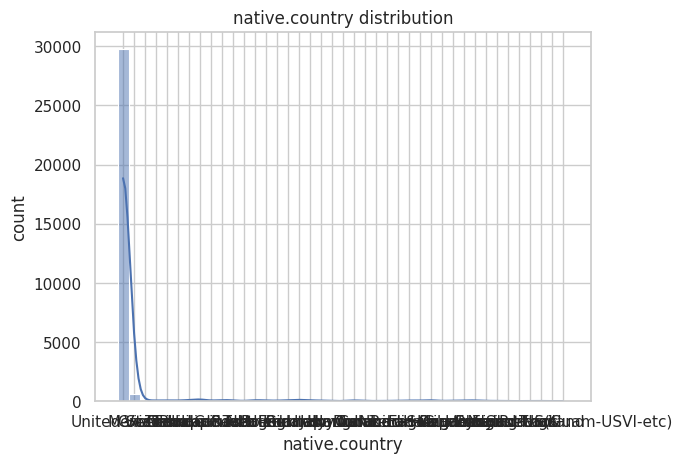

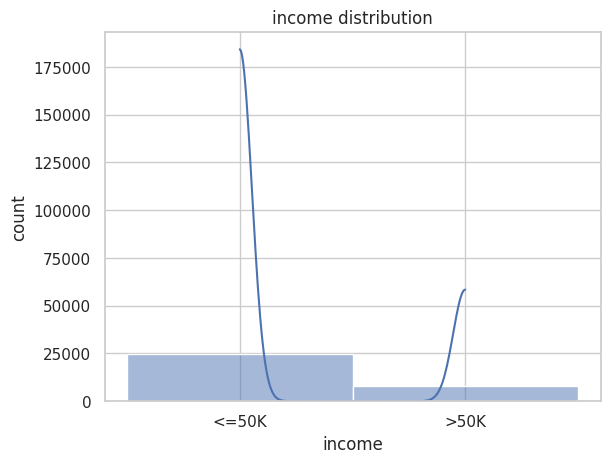

In [68]:
# Plotting all columns as histogram
for i in df.columns:
  sns.histplot(x=i, data=df, kde =True, bins=20)
  plt.xlabel(i)
  plt.title(f'{i} distribution')
  plt.ylabel('count')
  plt.show()


10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
Name: education, dtype: int64


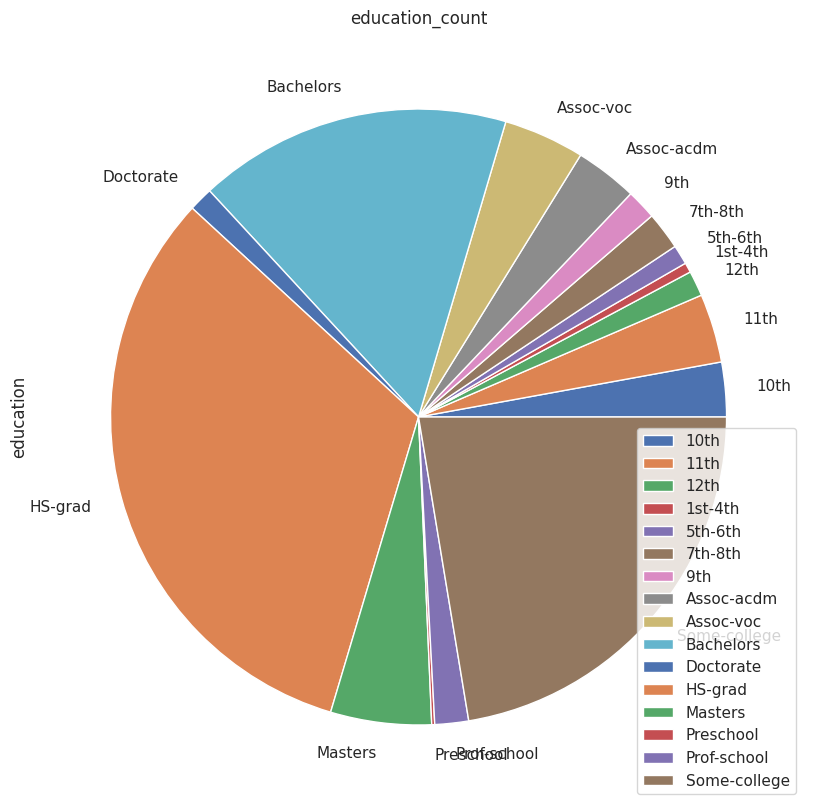

In [76]:
counts =df['education'].value_counts().sort_index()
print(counts)
counts.plot(kind='pie',title='education_count', figsize=(11,10))
plt.legend()
plt.show()

Text(0.5, 1.0, 'CORRELATION MATRIX')

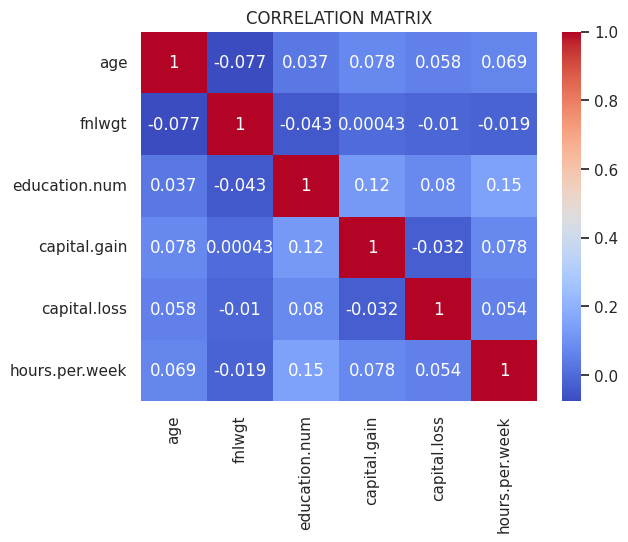

In [83]:
#Plotting of heatmap to find the correlation
data=df.select_dtypes(include ='number')
data=data.corr()
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title("CORRELATION MATRIX")